In [28]:
# Importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, accuracy_score, classification_report



In [29]:
# Reading the pre-processed Dataset
adult_dataset = pd.read_csv('pre_processed_dataset.csv')

adult_dataset.head()

,age,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per_week,income-per-year
0,39,13,4,1,1,2174,0,40,0
1,50,13,2,0,1,0,0,13,0
2,38,9,0,1,1,0,0,40,0
3,53,7,2,0,1,0,0,40,0
4,28,13,2,5,0,0,0,40,0


## Training the Random Forest Classification Model

In [30]:
# Split the data into features (X) and target variable (y)
y = adult_dataset['income-per-year']

X = adult_dataset.drop(['income-per-year'],axis=1)  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the training set
y_train_pred = rf_classifier.predict(X_train)

# Predict on the test set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the classifier for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

# Evaluate the classifier for testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("\nTraining Classification Report:\n", train_class_report)

print("\nTesting Accuracy:", test_accuracy)
print("\nTesting Classification Report:\n", test_class_report)


Training Accuracy: 0.9151372237058923

Training Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     26114
           1       0.88      0.78      0.83      9084

    accuracy                           0.92     35198
   macro avg       0.90      0.87      0.88     35198
weighted avg       0.91      0.92      0.91     35198


Testing Accuracy: 0.8403409090909091

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6577
           1       0.71      0.62      0.66      2223

    accuracy                           0.84      8800
   macro avg       0.79      0.77      0.78      8800
weighted avg       0.83      0.84      0.84      8800



### Evaluation Methods

#### Confusion Matrix

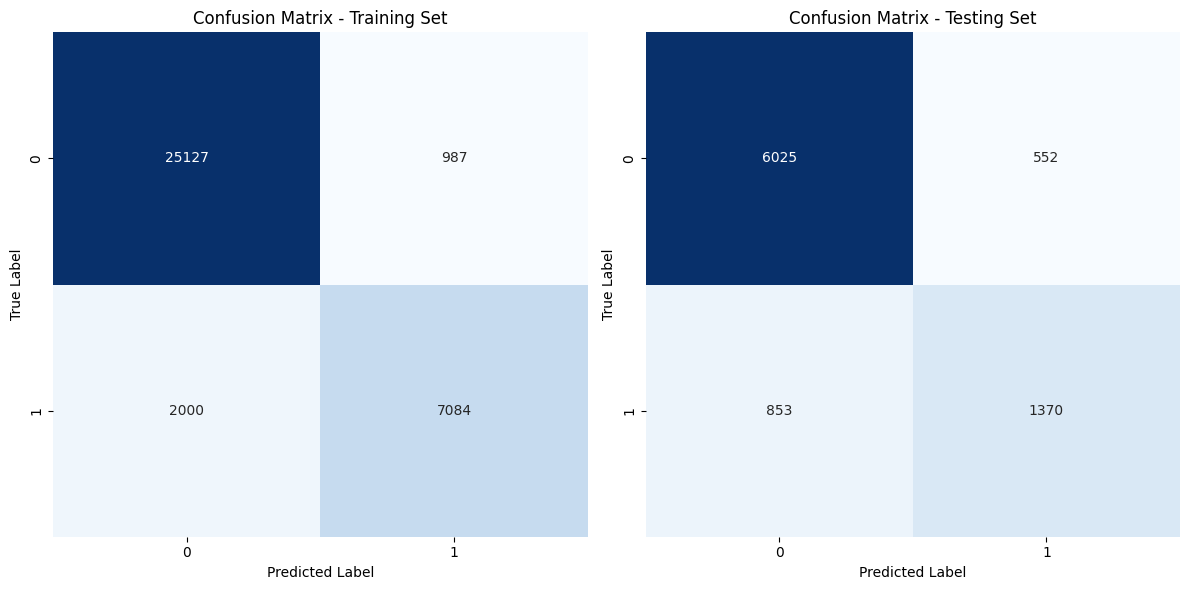

In [32]:
# Confusion Matrix for training set
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Confusion Matrix for testing set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()

#### Precision and Recall Curve

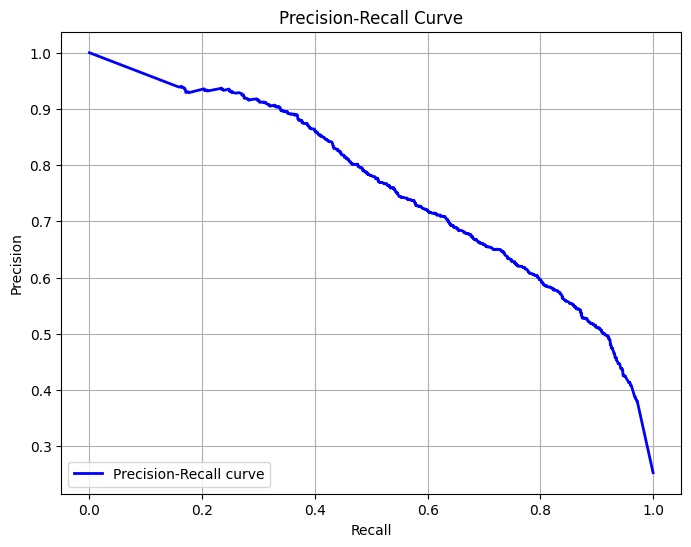

In [33]:
# Precision and Recall Curve
# Get predicted probabilities for the positive class (class 1)
y_test_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_test_probs)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


#### Learning Curve

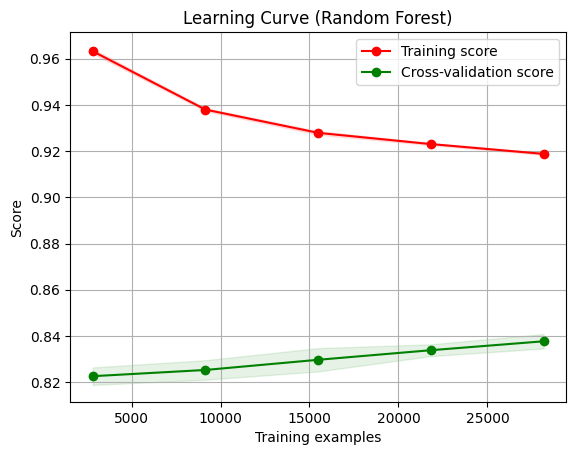

In [34]:
# Define a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Plot learning curve
title = "Learning Curve (Random Forest)"
plot_learning_curve(rf_classifier, title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()

#### ROC and AUC Curve

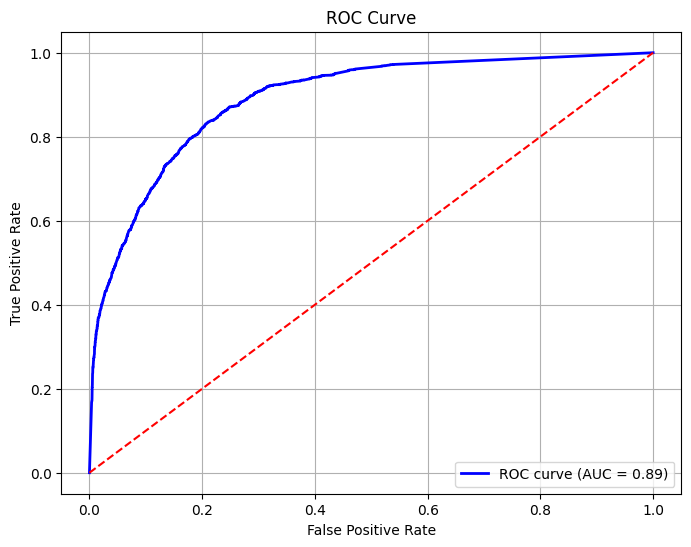

AUC Score: 0.8901412253924599


In [35]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_test_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("AUC Score:", auc_score)


This is Evaluations are before the Model Optimization Let's Optimize the Model and See the Differences it makes